<a href="https://colab.research.google.com/github/lsharples1/Data-Mining-Final/blob/main/DataMiningFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from  sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv('https://raw.githubusercontent.com/lsharples1/Data-Mining-Final/main/Downloads/airbnb_data/airbnb_data.csv')

#change string of amenities to numerical count of amenities
amenities = data['amenities']
num_a = []
for entry in amenities:
  num_a.append(entry.count(',')+1)
data['amenities'] = num_a

#drop row where price = 0
data = data.drop(11632)

#drop entries with lots of null counts
data = data.drop(['id','first_review','host_response_rate','last_review','review_scores_rating','thumbnail_url','latitude','longitude'],axis=1)

#print(data.city.unique())

#maybe come back and do text classification on these if we want/have time but dropping for now
data = data.drop(['description','name'],axis=1)
encode_tf = {'host_has_profile_pic': {'t':1, 'f':0},
             'host_identity_verified': {'t':1, 'f':0},
             'instant_bookable': {'t':1, 'f':0}}
data = data.replace(encode_tf)
data['cleaning_fee'] = data['cleaning_fee'].astype(int)

#label encode categorical data
data['property_type'] = data['property_type'].astype('category')
data['property_type_cat'] = data['property_type'].cat.codes

data['zipcode'] = data['zipcode'].astype('category')
data['zipcode_cat'] = data['zipcode'].cat.codes

data['room_type'] = data['room_type'].astype('category')
data['room_type_cat'] = data['room_type'].cat.codes

data['bed_type'] = data['bed_type'].astype('category')
data['bed_type_cat'] = data['bed_type'].cat.codes

data['cancellation_policy'] = data['cancellation_policy'].astype('category')
data['cancellation_policy_cat'] = data['cancellation_policy'].cat.codes
print(len(data.zipcode.unique()))
data['neighbourhood'] = data['neighbourhood'].astype('category')
data['neighbourhood_cat'] = data['neighbourhood'].cat.codes

data['city'] = data['city'].astype('category')
data['city_cat'] = data['city'].cat.codes
#drop all the non encoded, but not replacing them in case we need them later idk
data = data.drop(['property_type','room_type','bed_type','cancellation_policy','city','neighbourhood','zipcode'],axis=1)

#change price from log to normal when analyzing? for x in data[price] x

#encode: Xproperty_type, Xroom_type, Xbed_type, Xcancellation_policy, Xcleaning_fee (0 and 1), Xcity, Xhost_has_profile_pic(0 and 1), Xhost_identity_verified(0 and 1), Xinstant_bookable(0 and 1)

#null values: bathrooms,bedrooms,beds. use median valuue for null since these are important, don't want to drop these columns
data['bathrooms'].fillna((data['bathrooms'].median()), inplace=True)
data['bedrooms'].fillna((data['bathrooms'].median()), inplace=True)
data['beds'].fillna((data['bathrooms'].median()), inplace=True)
data['zipcode_cat'].fillna((data['zipcode_cat'].median()), inplace=True)
data['neighbourhood_cat'].fillna((data['neighbourhood_cat'].median()), inplace=True)
data['host_has_profile_pic'].fillna(1.0, inplace=True)
data['host_identity_verified'].fillna(1.0, inplace=True)

data = data.drop(['host_since'],axis=1)
y = data.log_price
x = data.drop(['log_price'],axis=1)

print(data)




#PREPROCESSING: ALL DATA IS NUMERICAL.
#GOT RID OF COLUMNS WITH LOTS OF NULL VALS.
#TO DO: ***feature selection, models, model evaluation, report.


770
       log_price  amenities  ...  neighbourhood_cat  city_cat
0       5.010635          9  ...                 77         4
1       5.129899         15  ...                252         4
2       4.976734         19  ...                247         4
3       6.620073         15  ...                325         5
4       4.744932         12  ...                119         2
...          ...        ...  ...                ...       ...
74106   4.605170          1  ...                605         4
74107   5.043425         16  ...                255         3
74108   5.220356         31  ...                605         4
74109   5.273000         15  ...                592         4
74110   4.852030         18  ...                319         3

[74110 rows x 18 columns]


In [ ]:
print(data['log_price'].idxmin())

3898


In [ ]:
from sklearn.metrics import r2_score
#VARIANCE THRESHOLD FEATURE SELECTION
cols = x.columns
scaler = MinMaxScaler()
XMinMax = scaler.fit_transform(x)
XMinMax = pd.DataFrame(XMinMax, columns = cols)

stats = XMinMax.describe().T
stats['var'] = stats['std'].apply(lambda x: x*x)
stats.sort_values(by='var',inplace=True,ascending=False)    
print(stats['var'])

vThres = VarianceThreshold(threshold=0)
Xfit = vThres.fit_transform(XMinMax)
columns = XMinMax.columns
features = vThres.get_support()
for c,b in zip(columns,features):
    print(f'{c}\t{b}')

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

linreg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test =  train_test_split(Xfit, y, test_size=0.3, shuffle=True)

# fit the data
linreg.fit(x_train, y_train)
y_pred=linreg.predict(x_test)
mse = metrics.mean_squared_error(y_test,linreg.predict(x_test))
mae = metrics.mean_absolute_error(y_test,linreg.predict(x_test))
r2 = r2_score(y_test, linreg.predict(x_test))
print("linear regression MSE", mse)
print("linear regression MAE:", mae)
print("linear regression r2:", r2)
rf = RandomForestRegressor() 
rf.fit(x_train,y_train)
mse = metrics.mean_squared_error(y_test,rf.predict(x_test))
mae = metrics.mean_absolute_error(y_test,rf.predict(x_test))
r2 = r2_score(y_test, rf.predict(x_test))
print("rf MSE", mse)
print("rf MAE:", mae)
print("rf r2:", r2)

dt = tree.DecisionTreeRegressor()
dt.fit(x_train,y_train)
mse = metrics.mean_squared_error(y_test,dt.predict(x_test))
mae = metrics.mean_absolute_error(y_test,dt.predict(x_test))
r2 = r2_score(y_test, dt.predict(x_test))
print("dt MSE", mse)
print("dt MAE:", mae)
print("dt r2:", r2)


scaler = StandardScaler()
xScaled= scaler.fit_transform(x)

host_identity_verified     0.219793
cleaning_fee               0.195213
instant_bookable           0.193572
neighbourhood_cat          0.104676
zipcode_cat                0.084238
room_type_cat              0.076888
property_type_cat          0.064238
city_cat                   0.055871
cancellation_policy_cat    0.045661
accommodates               0.020613
bed_type_cat               0.011242
bedrooms                   0.007254
amenities                  0.006660
bathrooms                  0.005281
beds                       0.004849
number_of_reviews          0.003910
host_has_profile_pic       0.003040
Name: var, dtype: float64
amenities	True
accommodates	True
bathrooms	True
cleaning_fee	True
host_has_profile_pic	True
host_identity_verified	True
instant_bookable	True
number_of_reviews	True
bedrooms	True
beds	True
property_type_cat	True
zipcode_cat	True
room_type_cat	True
bed_type_cat	True
cancellation_policy_cat	True
neighbourhood_cat	True
city_cat	True
linear regression MSE 0.241487

In [ ]:
data[['zipcode_cat',	'room_type_cat',	'bed_type_cat',	'cancellation_policy_cat',	'neighbourhood_cat',	'city_cat']].describe()

,zipcode_cat,room_type_cat,bed_type_cat,cancellation_policy_cat,neighbourhood_cat,city_cat
count,74110.000000,74110.000000,74110.000000,74110.000000,74110.000000,74110.000000
mean,334.166266,0.471758,3.935191,1.136324,286.016489,3.292619
std,223.192966,0.554574,0.424107,0.854733,200.269418,1.181856
min,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,107.000000,0.000000,4.000000,0.000000,106.000000,3.000000
50%,331.000000,0.000000,4.000000,1.000000,262.000000,4.000000
75%,489.000000,1.000000,4.000000,2.000000,475.000000,4.000000
max,768.000000,2.000000,4.000000,4.000000,618.000000,5.000000


In [ ]:
len(data)

74110

       log_price  amenities  ...  neighbourhood_cat  city_cat
0       5.010635          9  ...                 77         4
1       5.129899         15  ...                252         4
2       4.976734         19  ...                247         4
3       6.620073         15  ...                325         5
4       4.744932         12  ...                119         2
...          ...        ...  ...                ...       ...
74106   4.605170          1  ...                605         4
74107   5.043425         16  ...                255         3
74108   5.220356         31  ...                605         4
74109   5.273000         15  ...                592         4
74110   4.852030         18  ...                319         3

[74110 rows x 18 columns]


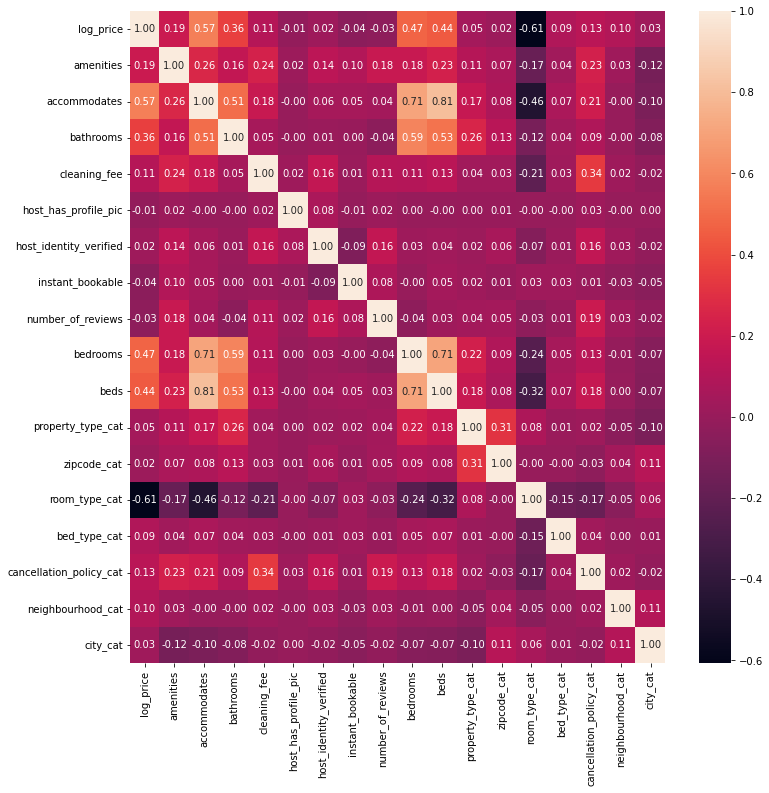

In [ ]:
#correlation graphs
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,fmt='.2f')

In [ ]:
# Recursive Feature Selection

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.metrics import r2_score
linreg = linear_model.LinearRegression()
rf = RandomForestRegressor() 
dt = tree.DecisionTreeRegressor()
selector = RFE(linreg, n_features_to_select=5, step=1)
selectorRF = RFE(rf, n_features_to_select=5, step=1)
selectorDT = RFE(dt, n_features_to_select=5, step=1)
Xfit = selector.fit_transform(XMinMax, y)
XfitRF = selectorRF.fit_transform(XMinMax, y)
XfitDT = selectorDT.fit_transform(XMinMax, y)



# fit the data
x_train, x_test, y_train, y_test =  train_test_split(Xfit, y, test_size=0.3, shuffle=True)
linreg.fit(x_train, y_train)
y_pred=linreg.predict(x_test)
mse = metrics.mean_squared_error(y_test,linreg.predict(x_test))
mae = metrics.mean_absolute_error(y_test,linreg.predict(x_test))
r2 = r2_score(y_test, linreg.predict(x_test))
print("Linear Regression MSE", mse)
print("linear regression MAE:", mae)
print("linear regression r2:", r2)
# fit the data
x_train, x_test, y_train, y_test =  train_test_split(XfitRF, y, test_size=0.3, shuffle=True)
rf.fit(x_train, y_train)
#y_pred=linreg.predict(x_test)
mse = metrics.mean_squared_error(y_test,rf.predict(x_test))
mae = metrics.mean_absolute_error(y_test,rf.predict(x_test))
r2 = r2_score(y_test, rf.predict(x_test))
print("rf MSE", mse)
print("rf MAE:", mae)
print("dt r2:", r2)

# fit the data
x_train, x_test, y_train, y_test =  train_test_split(XfitDT, y, test_size=0.3, shuffle=True)
dt.fit(x_train, y_train)
#y_pred=linreg.predict(x_test)
mse = metrics.mean_squared_error(y_test,dt.predict(x_test))
mae = metrics.mean_absolute_error(y_test,dt.predict(x_test))
r2 = r2_score(y_test, dt.predict(x_test))
print("dt MSE", mse)
print("dt MAE:", mae)
print("dt r2:", r2)
columns = x.columns

# print out some of the variables stored in RFE
print(f'Features in X: {len(columns)}')
print(f'Size of selector.support_: {len(selector.support_)}')
print(f'Size of selector.ranking_: {len(selector.ranking_)}')
print(f'Features in fitted estimator (excluding bias): {len(selector.estimator_.coef_)}')
df1 = pd.DataFrame({'Column':columns, 'Included':selector.support_, 'Rank':selector.ranking_})
df1
print(f'Features in X: {len(columns)}')
print(f'Size of selector.support_: {len(selectorRF.support_)}')
print(f'Size of selector.ranking_: {len(selectorRF.ranking_)}')
print(f'Features in fitted estimator (excluding bias): {len(selectorRF.estimator_.feature_importances_)}')
df2 = pd.DataFrame({'Column':columns, 'Included':selector.support_, 'Rank':selector.ranking_})
df2
print(f'Features in X: {len(columns)}')
print(f'Size of selector.support_: {len(selectorDT.support_)}')
print(f'Size of selector.ranking_: {len(selectorDT.ranking_)}')
print(f'Features in fitted estimator (excluding bias): {len(selectorDT.estimator_.feature_importances_)}')
df3 = pd.DataFrame({'Column':columns, 'Included':selector.support_, 'Rank':selector.ranking_})
df3

Linear Regression MSE 0.2551622520298316
linear regression MAE: 0.38260872363719517
linear regression r2: 0.5055087403858953
rf MSE 0.22326298893691113
rf MAE: 0.3458177181919688
dt r2: 0.5750351414831114
dt MSE 0.3614891418926037
dt MAE: 0.4441749503060509
dt r2: 0.2941006338942971
Features in X: 17
Size of selector.support_: 17
Size of selector.ranking_: 17
Features in fitted estimator (excluding bias): 5
Features in X: 17
Size of selector.support_: 17
Size of selector.ranking_: 17
Features in fitted estimator (excluding bias): 5
Features in X: 17
Size of selector.support_: 17
Size of selector.ranking_: 17
Features in fitted estimator (excluding bias): 5


,Column,Included,Rank
0,amenities,False,3
1,accommodates,True,1
2,bathrooms,True,1
3,cleaning_fee,False,8
4,host_has_profile_pic,False,5
5,host_identity_verified,False,11
6,instant_bookable,False,9
7,number_of_reviews,False,2
8,bedrooms,True,1
9,beds,True,1


In [ ]:
df2

,Column,Included,Rank
0,amenities,False,3
1,accommodates,True,1
2,bathrooms,True,1
3,cleaning_fee,False,8
4,host_has_profile_pic,False,5
5,host_identity_verified,False,11
6,instant_bookable,False,9
7,number_of_reviews,False,2
8,bedrooms,True,1
9,beds,True,1


In [ ]:
df1

,Column,Included,Rank
0,amenities,False,3
1,accommodates,True,1
2,bathrooms,True,1
3,cleaning_fee,False,8
4,host_has_profile_pic,False,5
5,host_identity_verified,False,11
6,instant_bookable,False,9
7,number_of_reviews,False,2
8,bedrooms,True,1
9,beds,True,1


In [ ]:
df3

,Column,Included,Rank
0,amenities,False,3
1,accommodates,True,1
2,bathrooms,True,1
3,cleaning_fee,False,8
4,host_has_profile_pic,False,5
5,host_identity_verified,False,11
6,instant_bookable,False,9
7,number_of_reviews,False,2
8,bedrooms,True,1
9,beds,True,1


In [ ]:
from sklearn.model_selection import train_test_split


#linRegx = x.drop(['property_type_cat','number_of_reviews','cancellation'],axis=1)
#linRegxScaled = scaler.fit_transform(linRegx)

x_train, x_test, y_train, y_test =  train_test_split(XMinMax, y, test_size=0.3, shuffle=True)
#linear regression, non ensemble
#using the top 6 features
print(y_train.size)
print(y_test.size)
from sklearn import linear_model
regr = linear_model.LinearRegression()
# fit the data
regr.fit(x_train, y_train)
y_pred=regr.predict(x_test)
mse = metrics.mean_squared_error(y_test,regr.predict(x_test))
mae = metrics.mean_absolute_error(y_test,regr.predict(x_test))
print("linear regression MSE", mse)
print("linear regression MAE:", mae)
print(regr.score(x_test,y_test))

51877
22233
linear regression MSE 0.24238999047344445
linear regression MAE: 0.37095267308282814
0.5309111474086656


In [ ]:
#USE ANALYSIS() AFTER FITTING MODELS

In [ ]:
#bagging regressor, ensemble



In [ ]:
#random forest regressor, ensemble

from sklearn import tree
import scipy.stats
treeLearner = tree.DecisionTreeRegressor()

rf = RandomForestRegressor(n_estimators=100) 
                           
rf.fit(x_train,y_train)


#selector = RFE(rf, n_features_to_select=2, step=1)
#Xfit = selector.fit_transform(x, y)
#columns = x.columns
# print out some of the variables stored in RFE
#print(f'Features in X: {len(columns)}')
#print(f'Size of selector.support_: {len(selector.support_)}')
#print(f'Size of selector.ranking_: {len(selector.ranking_)}')
#print(f'Features in fitted estimator (excluding bias): {len(selector.estimator_.feature_importances_)}')
#df = pd.DataFrame({'Column':columns, 'Included':selector.support_, 'Rank':selector.ranking_})
#df

print(rf.score(x_test,y_test))

mse = metrics.mean_squared_error(y_test,rf.predict(x_test))
mae = metrics.mean_absolute_error(y_test,rf.predict(x_test))
print("random forest MSE", mse)
print("random forest MAE:", mae)


0.6615284803534217
linear regression MSE 0.17271818730490243
linear regression MAE: 0.2998665350530761


Random Forest Feature Selection, included = 2


In [ ]:
#ada boost regressor, ensemble
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
import scipy.stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
#scaled with base estimator, 100e stimators, rate 0.5- .874
#without base estimator, estimators = 64, rate = .05- 0.872
treeLearner = tree.DecisionTreeRegressor()

bagging = AdaBoostRegressor(
                           base_estimator=tree.DecisionTreeRegressor(),
                           n_estimators=25, 
                           learning_rate=0.05, 
                           )
bagging.fit(x_train, y_train)                         
#predicted= np.array(bagging.predict(x_test2))
print(bagging.score(x_test,y_test))
mse = metrics.mean_squared_error(y_test,bagging.predict(x_test))
mae = metrics.mean_absolute_error(y_test,bagging.predict(x_test))
r2 = r2_score(y_test, bagging.predict(x_test))
print("ada bagging MSE", mse)
print("ada bagging MAE:", mae)
print("ada bagging R2:", r2)

0.6353503399690765
ada bagging MSE 0.18842363687129132
ada bagging MAE: 0.3101362423934578
ada bagging R2: 0.6353503399690765


null counts: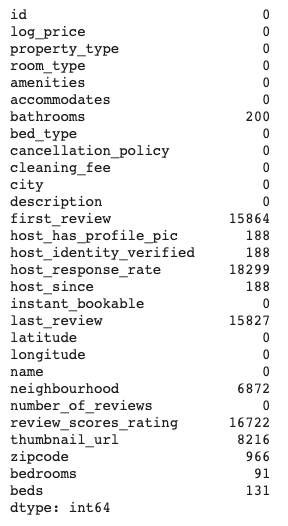

In [ ]:
for col in x.columns:
  print(x[col].size)

74110
74110
74110
74110
74110
74110
74110
74110
74110
74110
74110
74110
74110
74110
74110
74110
74110


In [ ]:
# linear regression, decision tree, bagging with decision tree
# also using ada and random forest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
from sklearn import linear_model
import sklearn.metrics as metrics
from  sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


#print(df.columns.values.tolist())

# non-ensemble, linear regression



scaler = StandardScaler()
xscaled= scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.3)

regr = linear_model.LinearRegression()
# fit the data
regr.fit(x_train, y_train)

mse = metrics.mean_squared_error(y_test,regr.predict(x_test))
mae = metrics.mean_absolute_error(y_test,regr.predict(x_test))
r2 = r2_score(y_test, regr.predict(x_test))
print("linear regression MSE", mse)
print("linear regression MAE:", mae)
print("linear regression r2:", r2)
rf = RandomForestRegressor() 
rf.fit(x_train,y_train)
mse = metrics.mean_squared_error(y_test,rf.predict(x_test))
mae = metrics.mean_absolute_error(y_test,rf.predict(x_test))
r2 = r2_score(y_test, rf.predict(x_test))
print("rf MSE", mse)
print("rf MAE:", mae)
print("linear regression r2:", r2)

treeLearner = tree.DecisionTreeRegressor()

bagging1 = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(), 
                            n_estimators=25, 
                            max_samples=1.0, 
                            max_features=1.0)

scaler = StandardScaler()
xscaled= scaler.fit_transform(x)

X_train, X_test, y_train, y_test =  train_test_split(xscaled, y, test_size=0.25)

for clf in [treeLearner,bagging1]:
    clf.fit(X_train, y_train)                         
    predicted= np.array(clf.predict(X_test))
    mse = metrics.mean_squared_error(y_test,predicted)
    mae = metrics.mean_absolute_error(y_test,predicted)
    print(f"\n{clf.__class__}")
    print(f"MSE:{metrics.mean_squared_error(y_test,predicted)}")
    print(f"MAE:{metrics.mean_absolute_error(y_test,predicted)}")
    print(f"R2:{metrics.r2_score(y_test,predicted)}")

# mse = metrics.mean_squared_error(y_test,treeLearner.predict(x_test))
# mae = metrics.mean_absolute_error(y_test,treeLearner.predict(x_test))
# print("decision tree MSE", mse)
# print("decision tree MAE:", mae)

# mse = metrics.mean_squared_error(y_test,bagging1.predict(x_test))
# mae = metrics.mean_absolute_error(y_test,bagging1.predict(x_test))
# print("bagging with decision tree MSE", mse)
# print("bagging with decision tree MAE:", mae)


linear regression MSE 0.23953924855505954
linear regression MAE: 0.3681863052602883
linear regression r2: 0.5314482493621415
rf MSE 0.16977642995722772
rf MAE: 0.29868073928360506
linear regression r2: 0.6679081029377948

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE:0.33559867063748494
MAE:0.418167003204619
R2:0.34230649519382694

<class 'sklearn.ensemble._bagging.BaggingRegressor'>
MSE:0.17470606637857627
MAE:0.30240173965914297
R2:0.6576176988747835
